In [ ]:
import pandas as pd
import numpy as np

### Numpy часть

#### Часть 1

In [ ]:
colnames = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]
data = pd.read_csv("iris_data.csv", header=None, names=colnames)

data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
unique_classes, data['target'] = np.unique(data['target'], return_inverse=True)# преобразуем в числовые значения

In [ ]:
y = data['target'].astype(str).to_numpy()
X = data.iloc[:, :4].to_numpy()

Отразим, сколько места они занимают

In [ ]:
print("X:", X.nbytes, "bytes")
print("y:", y.nbytes, "bytes")

X: 4800 bytes
y: 1200 bytes


Нормализуем данные:

In [ ]:
X_min = X.min(axis=0)
X_max = X.max(axis=0)

X_scaled = (X - X_min) / (X_max - X_min)
X_scaled[:10]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ]])

Представим один из признаков в виде категориальной переменной

In [ ]:
petal_length = data['petal_length']

q25 = np.percentile(petal_length, 25)
q75 = np.percentile(petal_length, 75)

labels = ['small', 'medium', 'big']
categories = np.empty(petal_length.shape, dtype=object)

categories[petal_length <= q25] = 'small'
categories[(petal_length > q25) & (petal_length <= q75)] = 'medium'
categories[petal_length > q75] = 'big'

Разделим на тестовую и тренировочную выборки:

In [ ]:
indices = np.random.permutation(len(X))
train_size = int(0.8 * len(X))
test_size = len(X) - train_size

X_train, X_test = X_scaled[indices[:train_size]], X_scaled[indices[train_size:]]
y_train, y_test = y[indices[:train_size]], y[indices[train_size:]]

#### Часть 2

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
svc_basic = SVC(kernel='linear', random_state=42)

svc_basic.fit(X_train, y_train)
y_pred_basic = svc_basic.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_basic)
accuracy

0.9666666666666667

Ответ:

Accuracy равен почти еденице, а значит модель достаточно хорошо обучается на тестовых данных

Поставим три эксперемента:

1 Эксперемент - обучение на ненормализованных данных

In [ ]:
X_train_raw = X[indices[:train_size]]
X_test_raw = X[indices[train_size:]]

svc_raw = SVC(kernel='linear', random_state=42)
svc_raw.fit(X_train_raw, y_train)
y_pred_raw = svc_raw.predict(X_test_raw)

accuracy2 =  accuracy_score(y_test, y_pred_raw)

accuracy, accuracy2

(0.9666666666666667, 0.9333333333333333)

Вывод: нормализация данных влияет на качество обучения модели

2 Эксперемент - использование ядра sigmoid

In [ ]:
svc_rbf = SVC(kernel='sigmoid', random_state=42)
svc_rbf.fit(X_train, y_train)
y_pred_rbf = svc_rbf.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred_rbf)

accuracy, accuracy3

(0.9666666666666667, 0.36666666666666664)

Вывод: ядро sigmoid не подходит для обучения данной модели, accuracy стал очень низким

3 Эксперемент - меняем значение С и gamma для нормализованных данных

In [ ]:
svc_cg = SVC(kernel='linear', C=5, gamma=0.2, random_state=42)
svc_cg.fit(X_train, y_train)
y_pred_cg = svc_cg.predict(X_test)


accuracy4 = accuracy_score(y_test, y_pred_cg)

accuracy, accuracy4

(0.9666666666666667, 0.9666666666666667)

Изменение гиперпараметров С и gamma не существенно влияет на качество обучения модели.

### Визуализация



In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
pca = PCA(n_components=2, random_state=42) #уменьшаем размерность
X_pca = pca.fit_transform(X_scaled) # обучаем PCA и преобразовываем модель

y_pred_basic = svc_basic.predict(X_scaled) # используем обученную модель, чтобы предсказать класс на всех данных

In [ ]:
y_num = y.astype(int)
y_pred_num = y_pred_basic.astype(int)

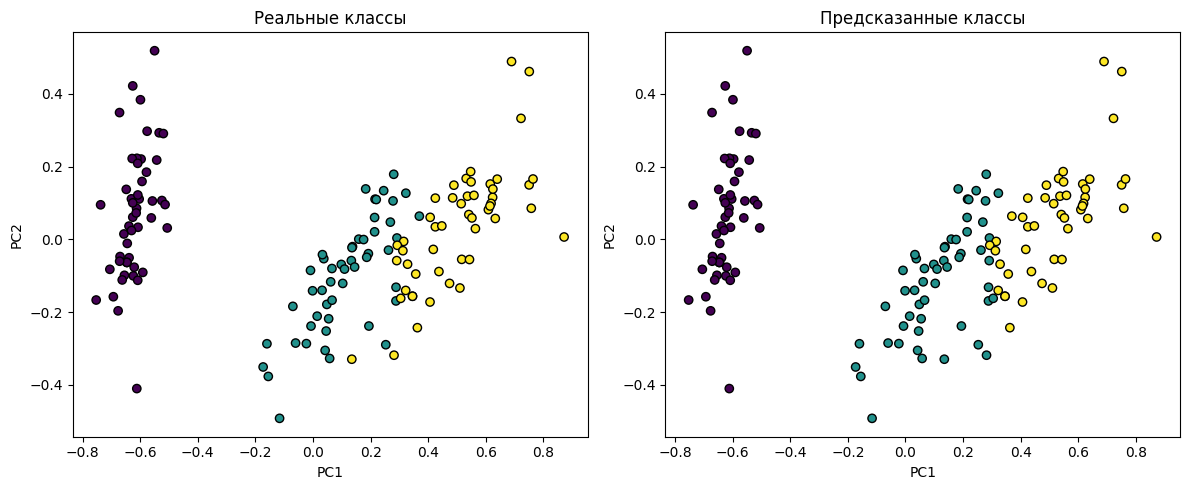

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_num, edgecolor='k')
plt.title("Реальные классы")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_num, edgecolor='k')
plt.title("Предсказанные классы")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()